# 2.2 数据操作

在深度学习中，我们通常会频繁地对数据进行操作。作为动手学深度学习的基础，本节将介绍如何对内存中的数据进行操作。

在TensorFlow中，tensor是一个类，也是存储和变换数据的主要工具。如果你之前用过NumPy，你会发现tensor和NumPy的多维数组非常类似。然而，tensor提供GPU计算和自动求梯度等更多功能，这些使tensor更加适合深度学习。

In [3]:
import tensorflow as tf

2.2.1 创建tensor
---

In [213]:
x= tf.constant(value=range(12))

In [214]:
x

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>

In [215]:
x.shape

TensorShape([12])

In [216]:
len(x)

12

---

In [217]:
tf.reshape(tensor=x,shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int32)>

---

In [218]:
tf.zeros(shape=(2,3,4))

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)>

In [219]:
tf.ones(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [220]:
tf.constant(value=[[1,2,3],[4,5,6],[6,7,8]],dtype=tf.float32)
    # 指定了数据类型

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [6., 7., 8.]], dtype=float32)>

In [221]:
tf.random.normal(shape=[3,4],mean=0,stddev=1)
    # 每个元素都随机采样于均值为0、标准差为1的正态分布

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.27108636, -1.4983273 ,  0.400383  , -0.49758855],
       [-1.219062  , -0.15664041,  0.50017726, -1.1559826 ],
       [ 0.39886874, -0.792249  ,  0.03717665, -0.692714  ]],
      dtype=float32)>

2.2.2 运算
---
tensor支持大量的运算符（operator）。按元素运算，所得结果形状不变。

In [222]:
X = tf.constant(value=[[1,1,1],[2,2,2],[3,3,3]])
Y = tf.constant(value=[[4,4,4],[5,5,5],[6,6,6]])

In [223]:
X + Y

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[5, 5, 5],
       [7, 7, 7],
       [9, 9, 9]], dtype=int32)>

In [224]:
X * Y

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 4,  4,  4],
       [10, 10, 10],
       [18, 18, 18]], dtype=int32)>

In [225]:
X / Y

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0.25, 0.25, 0.25],
       [0.4 , 0.4 , 0.4 ],
       [0.5 , 0.5 , 0.5 ]])>

In [226]:
Y = tf.cast(Y, tf.float32)
    # Casts a tensor to a new type.
tf.exp(Y)
    # 按元素指数运算

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 54.598152,  54.598152,  54.598152],
       [148.41316 , 148.41316 , 148.41316 ],
       [403.4288  , 403.4288  , 403.4288  ]], dtype=float32)>

---
矩阵乘法

In [227]:
Y = tf.cast(Y,dtype=tf.int32)

X.shape,Y.shape

(TensorShape([3, 3]), TensorShape([3, 3]))

In [228]:
tf.matmul(a = X,b = tf.transpose(Y))
    # a,b矩阵乘法 。这里根据矩阵运算规则，对Y进行了转置

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[12, 15, 18],
       [24, 30, 36],
       [36, 45, 54]], dtype=int32)>

In [229]:
tf.matmul(a=X,b=Y,transpose_b='True') 
    # 上述矩阵乘法的等价用法

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[12, 15, 18],
       [24, 30, 36],
       [36, 45, 54]], dtype=int32)>

---
tensor连结（concatenate）


引用Pytorch关于张量维度，以及concat的理解(仅供参考...仅供参考)
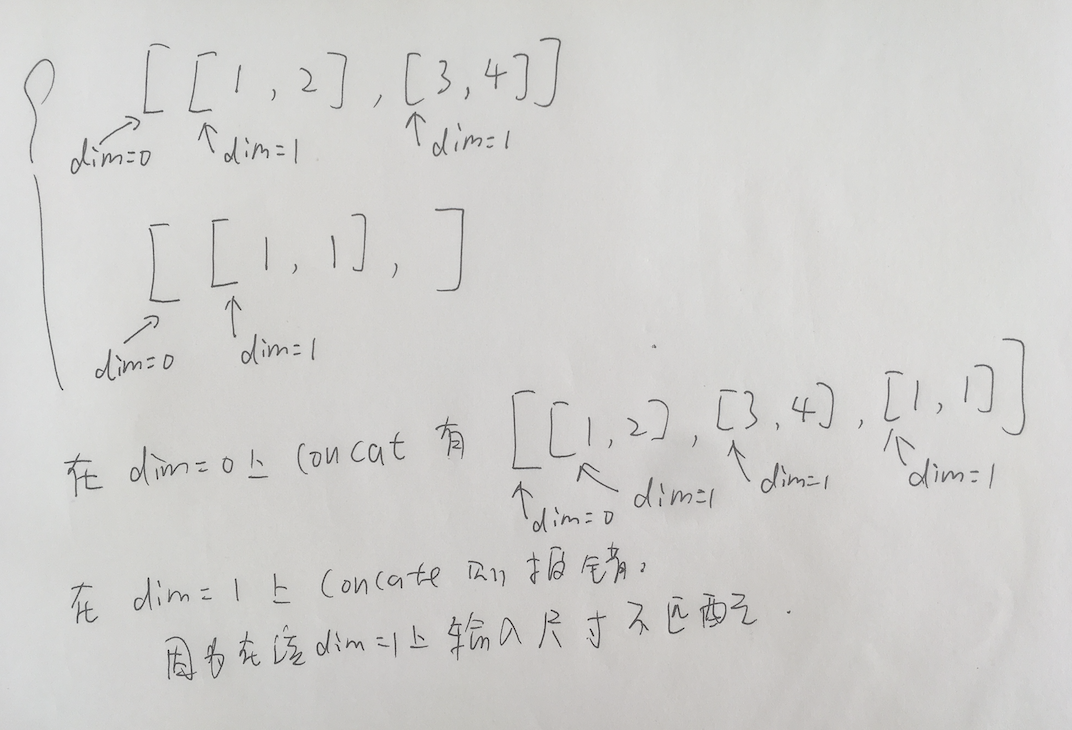

# dim的重要理解

关于维度，再举个官方的例子
```python
x = tf.constant([[1, 1, 1], [1, 1, 1]])
tf.reduce_sum(x)  # 6
tf.reduce_sum(x, 0)  # [2, 2, 2]
tf.reduce_sum(x, 1)  # [3, 3]
tf.reduce_sum(x, 1, keepdims=True)  # [[3], [3]]
tf.reduce_sum(x, [0, 1])  # 6
```


- 为什么呢？

将x = [[1,1,1],[1,1,1]] 理解为 x = [a,b] a=[1,1,1] b=[1,1,1] 其中x在dim=0上，a和b都在dim=1上。

tf.reduce_sum(x) 不指明dim，则全部的基本元素相加.相当于 sum([sum(a),sum(b)])

tf.reduce_sum(x,dim=0,keepdims=True) 对dim=0上的对象x进行操作，也即对x的元素进行相加，而x的元素为a和b。即 sum([a,b]) =[a+b] = [[2,2,2]]

tf.reduce_sum(x,dim=1,keepdims=True) 对dim=1上的对象进行操作。也即对a和b的元素进行相加。即 [sum(a),sum(b)] = [[1+1+1],[1+1+1]] = [[3],[3]]

keepdims=False可以理解为“简化维度”，如上[[2,2,2]]简化为[2,2,2] , [[3][,3]]简化为[3,3]


In [230]:
X,Y

(<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]], dtype=int32)>,
 <tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]], dtype=int32)>)

In [231]:
tf.concat([X,Y],axis = 0), tf.concat([X,Y],axis = 1)

(<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 6), dtype=int32, numpy=
 array([[1, 1, 1, 4, 4, 4],
        [2, 2, 2, 5, 5, 5],
        [3, 3, 3, 6, 6, 6]], dtype=int32)>)

---
concat报错

In [232]:
"""
Z =tf.constant([[6,6,6],])
tf.concat([X,Z],axis = 0), tf.concat([X,Z],axis = 1)

报错，维度dim=1上的尺寸不匹配
ConcatOp : Dimensions of inputs should match: shape[0] = [3,3] vs. shape[1] = [1,3] [Op:ConcatV2] name: concat
"""

'\nZ =tf.constant([[6,6,6],])\ntf.concat([X,Z],axis = 0), tf.concat([X,Z],axis = 1)\n\n报错，维度dim=1上的尺寸不匹配\nConcatOp : Dimensions of inputs should match: shape[0] = [3,3] vs. shape[1] = [1,3] [Op:ConcatV2] name: concat\n'

---
判真。按元素

In [233]:
tf.equal(x=X,y=Y)

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False, False, False],
       [False, False, False],
       [False, False, False]])>

---
tensor中所有元素求和

In [234]:
tf.reduce_sum(input_tensor=X)

<tf.Tensor: shape=(), dtype=int32, numpy=18>

In [235]:
X = tf.cast(x=X,dtype=tf.float32)
tf.norm(tensor=X)
    #计算向量、矩阵和张量的范数.

<tf.Tensor: shape=(), dtype=float32, numpy=6.4807405>

2.2.3 广播机制
---

前面我们看到如何对两个形状相同的tensor做按元素运算。当对两个形状不同的tensor按元素运算时，可能会触发广播（broadcasting）机制：先适当复制元素使这两个tensor形状相同后再按元素运算。

广播机制的应用：在神经网络的 Z = WA+b 中，运算+b时就会用到广播机制，广播机制的实质是复制一些列或行，使得tensor的矩阵运算得以进行。

In [236]:
A = tf.reshape(tensor=tf.constant(range(3)),shape=(3,1))
B = tf.reshape(tensor=tf.constant(range(2)), shape=(1,2))
A, B

(<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[0],
        [1],
        [2]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[0, 1]], dtype=int32)>)

由于A和B分别是3行1列和1行2列的矩阵，
如果要计算A + B，那么A中第一列的3个元素被广播（复制）到了第二列，
而B中第一行的2个元素被广播（复制）到了第二行和第三行。
如此，就可以对2个3行2列的矩阵按元素相加


In [237]:
A + B

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 2],
       [2, 3]], dtype=int32)>

2.2.4 索引
---

在tensor中，索引（index）代表了元素的位置。tensor的索引从0开始逐一递增。例如，一个3行2列的矩阵的行索引分别为0、1和2，列索引分别为0和1。

在下面的例子中，我们指定了tensor的行索引截取范围[1:3]。依据左闭右开指定范围的惯例，它截取了矩阵X中行索引为1和2的两行。

In [238]:
X

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]], dtype=float32)>

In [239]:
X[1:3]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [3., 3., 3.]], dtype=float32)>

---
指定索引位置的元素进行赋值

Variable和Tensor的区别？

见链接https://blog.csdn.net/u013841196/article/details/82960765
  
有说法：1.后者能做的事几乎前者也能做，2.前者就像是后者的封装，如下assign()方法是Variable变量才有的，而tensor不拥有。

官方说法：TensorFlow Variables 是内存中的容纳 tensor 的缓存，用它们在模型训练时(during training)创建、保存和更新模型参数(model parameters)。 TensorFlow tensor 看作是一个 n 维的数组或列表。

In [249]:
X = tf.Variable(X)
X[1,2].assign(9)   
    # 对索引于[1,2]处的元素重新赋值为9

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [2., 2., 9.],
       [3., 3., 3.]], dtype=float32)>

In [256]:
X[1:2,:]\
.assign(tf.ones(X[1:2,:].shape, dtype = tf.float32)*12)
    # 对第1行的进行重新赋值为[12.,12.,12.]

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[ 1.,  1.,  1.],
       [12., 12., 12.],
       [ 3.,  3.,  3.]], dtype=float32)>

2.2.5 运算的内存开销
---

引用下pytorch的说法(仅供参考...仅供参考)：张量与存储的区别。对于一个存储，我们能快速地在该数据上创建不同的张量视图或说索引方式。

在前面的例子里我们对每个操作新开内存来存储运算结果。举个例子，即使像Y = X + Y这样的运算，我们也会新开内存，然后将Y指向新内存。为了演示这一点，我们可以使用Python自带的id函数：如果两个实例的ID一致，那么它们所对应的内存地址相同；反之则不同。

In [266]:
X = tf.Variable(X)
Y = tf.cast(Y, dtype=tf.float32)

before = id(Y)
Y = Y + X
id(Y) == before
    # python id函数: Return the identity of an object.

False

如果想指定结果到特定内存，我们可以使用前面介绍的索引来进行替换操作。在下面的例子中，我们先通过zeros_like创建和Y形状相同且元素为0的tensor，记为Z。接下来，我们把X + Y的结果通过[:]写进Z对应的内存中。

In [268]:
Z = tf.Variable(tf.zeros_like(Y))
before = id(Z)
Z[:].assign(X + Y)
id(Z) == before

True

实际上，上例中我们还是为X + Y开了临时内存来存储计算结果，再复制到Z对应的内存。如果想避免这个临时内存开销，我们可以使用assign_{运算符全名}函数。

In [273]:
Z = tf.add(X, Y)
id(Z) == before

False

如果X的值在之后的程序中不会复用，我们也可以用 X[:] = X + Y 或者 X += Y 来减少运算的内存开销。

In [274]:
before = id(X)
X.assign_add(Y)
id(X) == before

True

2.2.6 tensor 和 NumPy 相互变换
---

In [275]:
import numpy as np

In [278]:
P = np.ones((2,3))
D = tf.ones((2,3))

In [279]:
type(P),type(D)

(numpy.ndarray, tensorflow.python.framework.ops.EagerTensor)

In [284]:
tf.constant(value=P)
    # ndarray -> tensor

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]])>

In [285]:
np.array(object=D)
    # tesnor -> ndarray

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)